In [50]:
import pandas as pd
import joblib
from sklearn.metrics.pairwise import cosine_similarity

# Load the preprocessed dataset
preprocessed_data_path = '/University/6th Semester/Sixth Semester/AI-Enhanced-Fitness-Wellness-Analyzer-Project/Data/MergedPreprocessedData/PartiallyProcessedData05.csv'
preprocessed_data = pd.read_csv(preprocessed_data_path)

# Assuming 'Id' is the user identifier, replace it with the actual user ID for whom you want recommendations
user_id = 590  # Replace 'user_id' with the actual user ID

# Check if the target user exists in the dataset
if user_id not in preprocessed_data['Id'].values:
    raise ValueError(f"User with ID {user_id} not found in the dataset.")

# Get the features of the target user
target_user_features = preprocessed_data[preprocessed_data['Id'] == user_id][['TotalSteps', 'Rating']].values

# Ensure that target_user_features is a 2D array with at least one feature
if target_user_features.shape[0] == 0:
    raise ValueError("Target user has zero features.")

# Load the trained recommendation model
model_path = '/University/6th Semester/Sixth Semester/AI-Enhanced-Fitness-Wellness-Analyzer-Project/Models/RecommendationModels/recommendationModel.pkl'
model = joblib.load(model_path)

# Calculate cosine similarity between the target user and all other users
preprocessed_data['Similarity'] = preprocessed_data.apply(lambda row: cosine_similarity(target_user_features, row[['TotalSteps', 'Rating']].values.reshape(1, -1))[0][0], axis=1)

# Get top N similar users
top_n_similar_users = preprocessed_data.nlargest(5, 'Similarity')

# Get the most rated items by the top N similar users
most_rated_items = top_n_similar_users.groupby('ActivityDay_y')['Rating'].mean().sort_values(ascending=False).head(10)

# Print the recommendations
print(f"Top 10 recommendations for user {user_id}: {most_rated_items.index.tolist()}")


Top 10 recommendations for user 590: ['04-12-16', '05-08-16', '05-11-16', '4/22/2016', '4/26/2016']


In [37]:
print(preprocessed_data['Id'].unique())

[590 942 410 709  30 980 897 155  39 319 478  61 983 777 659 613 631 306
  78 594  97 146 692 767 974   4  91 327 699 693 712 231 125 380 198 653
 700 374 850 253  98 718 191 951 247 521 505 926 432 963  85  92 512 466
 962 187 463  69 679  89 258  19 448 424 939  80 103 493 797 996  44 399
 414 488 406  40  47 739 112 940 544 120 285  71 826 394 468 707 798 794
 753 527 752 781 936 746 732 420  26 132 353 185 828 883 719 619 981 345
 385  23 564 511  51 982 332 328 160 504 559 235 520 378  59 545 439 471
 479 621 417  52 363 958 691 497 842 422 307 959  57 586 671 262 506 844
 950 710 684  66 152 409 833 282 745 837 606 350 689 748 524 654 556 212
 570 890 534 957 392 355 383 108 831 320 908 171 788 173 774 887 455 421
 608 921 845 366 164 555 580 349  21 636 109 233 397 975 891 973 220 674
 400 839 859 635 470 204 405 717 515 259  93 863 574 472 553 616 341 251
 513 209 539 100 481 331 303 792 647 201 407 726 549 591 333 413 346 275
 814 111 628  86 104 964 904 242 758 311 949 287 33

In [33]:
import pandas as pd

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def set_daily_step_goal(user_id, goal_multiplier=1.1):
    """
    Set a daily step goal for a user based on historical data.

    Parameters:
    - user_id: ID of the user for whom the goal is being set.
    - goal_multiplier: A multiplier to adjust the goal based on fitness objectives.

    Returns:
    - Recommended daily step goal for the user.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Print user_data for debugging
    print(f"User Data for User {user_id}:\n{user_data}")

    # Calculate the average daily steps for the user
    avg_daily_steps = user_data['TotalSteps'].mean()

    # Print average daily steps for debugging
    print(f"Avg Daily Steps for User {user_id}: {avg_daily_steps}")

    # Set the daily step goal based on the average and the goal multiplier
    daily_step_goal = int(avg_daily_steps * goal_multiplier)

    return daily_step_goal

# Example: Set daily step goal for user with ID 590
user_id = 590
goal = set_daily_step_goal(user_id)

print(f"Recommended daily step goal for User {user_id}: {goal} steps")

User Data for User 590:
         Id ActivityDate  TotalSteps ActivityDay_x  Calories_y ActivityDay_y  \
0       590     04-12-16        6145      04-12-16    0.428378      04-12-16   
586     590     04-12-16        5772     4/30/2016    0.418108      05-10-16   
855     590     04-12-16        2566      05-09-16    0.383514     4/30/2016   
1669    590    4/13/2016        8644      05-04-16    0.383514      05-08-16   
2219    590    4/14/2016        2047     4/21/2016    0.371622     4/30/2016   
...     ...          ...         ...           ...         ...           ...   
823020  590     05-02-16        4703     4/23/2016    0.943514     4/14/2016   
828051  590     05-07-16        6001     4/30/2016    1.000000     4/23/2016   
829735  590     05-09-16        7350     4/22/2016    0.818108      05-03-16   
830349  590     05-09-16        4888      05-12-16    0.391622     4/27/2016   
830753  590     05-10-16        9248     4/24/2016    0.825676     4/28/2016   

        Rating 

In [39]:
import pandas as pd
import numpy as np

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def suggest_activity_dates(user_id, intensity_threshold=0.8, rating_threshold=8, calorie_threshold=300):
    """
    Suggest specific dates for high-intensity workouts or activities based on the user's historical patterns.

    Parameters:
    - user_id: ID of the user for whom activity dates are being suggested.
    - intensity_threshold: Threshold for activity intensity to be considered high-intensity.
    - rating_threshold: Threshold for activity rating to be considered high-rated.
    - calorie_threshold: Threshold for calorie burn to be considered high.

    Returns:
    - List of suggested dates for high-intensity activities.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Filter data based on intensity, rating, and calorie thresholds
    high_intensity_data = user_data[user_data['Similarity'] > intensity_threshold]
    high_rating_data = user_data[user_data['Rating'] >= rating_threshold]
    high_calorie_data = user_data[user_data['Calories_y'] > calorie_threshold]

    # Find common dates among high-intensity, high-rating, and high-calorie data
    suggested_dates = set(high_intensity_data['ActivityDate']).intersection(
        set(high_rating_data['ActivityDate']).intersection(set(high_calorie_data['ActivityDate']))
    )

    return list(suggested_dates)

# Example: Suggest activity dates for user with ID 590
user_id = 590
suggested_dates = suggest_activity_dates(user_id)

print(f"Suggested activity dates for User {user_id}: {suggested_dates}")

Suggested activity dates for User 590: ['4/25/2016', '05-02-16', '05-12-16', '05-11-16', '05-01-16', '04-12-16', '4/29/2016', '4/19/2016', '4/13/2016', '05-10-16', '4/16/2016', '4/20/2016', '4/17/2016', '4/24/2016', '05-09-16', '4/27/2016', '4/14/2016', '4/15/2016', '4/28/2016', '05-08-16', '4/23/2016', '4/22/2016', '4/18/2016', '4/30/2016', '4/21/2016', '05-05-16', '05-03-16', '05-04-16', '4/26/2016', '05-07-16', '05-06-16']


In [40]:
import pandas as pd

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def caloric_intake_and_burn_recommendations(user_id, goal='weight_loss'):
    """
    Provide dietary recommendations based on the user's calorie burn and intake patterns.

    Parameters:
    - user_id: ID of the user for whom dietary recommendations are being suggested.
    - goal: Fitness goal, options include 'weight_loss', 'maintenance', or 'muscle_gain'.

    Returns:
    - Dietary recommendations based on the user's fitness goal.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Calculate total calorie burn and intake
    total_calorie_burn = user_data['Calories_y'].sum()
    total_calorie_intake = user_data['Calories_y'].sum()

    # Calculate net calorie balance (caloric deficit or surplus)
    net_calorie_balance = total_calorie_intake - total_calorie_burn

    # Define dietary recommendations based on fitness goals
    if goal == 'weight_loss':
        if net_calorie_balance < 0:
            recommendation = "You are on track for weight loss. Continue maintaining a caloric deficit."
        else:
            recommendation = "Consider adjusting your caloric intake to create a caloric deficit for weight loss."

    elif goal == 'maintenance':
        recommendation = "Your caloric intake and burn seem balanced. Maintain your current dietary habits."

    elif goal == 'muscle_gain':
        if net_calorie_balance > 0:
            recommendation = "You are on track for muscle gain. Continue maintaining a caloric surplus."
        else:
            recommendation = "Consider adjusting your caloric intake to create a caloric surplus for muscle gain."

    else:
        raise ValueError("Invalid fitness goal. Choose from 'weight_loss', 'maintenance', or 'muscle_gain'.")

    return recommendation

# Example: Provide caloric intake and burn recommendations for user with ID 590
user_id = 590
fitness_goal = 'weight_loss'
recommendation = caloric_intake_and_burn_recommendations(user_id, goal=fitness_goal)

print(f"Dietary recommendation for User {user_id} for {fitness_goal}: {recommendation}")


Dietary recommendation for User 590 for weight_loss: Consider adjusting your caloric intake to create a caloric deficit for weight loss.


In [43]:
import pandas as pd

# Load the preprocessed dataset
preprocessed_data_path = '/University/6th Semester/Sixth Semester/AI-Enhanced-Fitness-Wellness-Analyzer-Project/Data/MergedPreprocessedData/PartiallyProcessedData05.csv'
preprocessed_data = pd.read_csv(preprocessed_data_path)

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def calories_burned_analysis(user_id, top_activities=3):
    """
    Provide insights into calories burned during different activities.

    Parameters:
    - user_id: ID of the user for whom calorie burn analysis is being performed.
    - top_activities: Number of top activities to recommend.

    Returns:
    - Personalized recommendations for effective workouts based on calories burned.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Group data by activity type and calculate the total calories burned for each activity
    activity_calories = user_data.groupby('ActivityType')['Calories_y'].sum().reset_index()

    # Sort activities by total calories burned in descending order
    sorted_activities = activity_calories.sort_values(by='Calories_y', ascending=False)

    # Select the top activities
    top_activities_list = sorted_activities.head(top_activities)['ActivityType'].tolist()

    # Create personalized recommendations
    recommendations = f"For effective calorie burning, consider the following top {top_activities} activities:\n"
    for activity in top_activities_list:
        recommendations += f"- {activity}\n"

    return recommendations

# Example: Provide calories burned analysis for user with ID 590
user_id = 590
top_activities_recommendations = calories_burned_analysis(user_id, top_activities=3)

print(f"Calories Burned Analysis Recommendations for User {user_id}:\n{top_activities_recommendations}")


Calories Burned Analysis Recommendations for User 590:
For effective calorie burning, consider the following top 3 activities:
- Weightlifting
- Swimming
- Running



In [44]:
import pandas as pd

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def activity_patterns_and_day_analysis(user_id):
    """
    Identify patterns in activity days and correlate with user ratings.

    Parameters:
    - user_id: ID of the user for whom activity patterns are being analyzed.

    Returns:
    - Analysis results and recommendations.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Analyze activity patterns and user ratings
    activity_day_analysis = user_data.groupby(['ActivityDay_x', 'ActivityDay_y'])['Rating'].mean().reset_index()

    # Identify days or activities associated with higher user ratings
    high_rating_days = activity_day_analysis[activity_day_analysis['Rating'] >= 8]

    # Create analysis summary
    analysis_summary = f"Activity Patterns and Day Analysis for User {user_id}:\n"
    analysis_summary += "----------------------------------------------\n"

    if not high_rating_days.empty:
        analysis_summary += "Days or activities associated with higher user ratings:\n"
        analysis_summary += high_rating_days.to_string(index=False) + "\n"
    else:
        analysis_summary += "No specific days or activities associated with higher user ratings.\n"

    return analysis_summary

# Example: Perform activity patterns and day analysis for user with ID 590
user_id = 590
activity_day_analysis_results = activity_patterns_and_day_analysis(user_id)

print(activity_day_analysis_results)


Activity Patterns and Day Analysis for User 590:
----------------------------------------------
Days or activities associated with higher user ratings:
ActivityDay_x ActivityDay_y  Rating
     04-12-16      05-04-16     8.0
     04-12-16      05-05-16    10.0
     04-12-16      05-07-16    10.0
     04-12-16     4/14/2016    10.0
     04-12-16     4/17/2016     8.0
     04-12-16     4/20/2016     8.0
     04-12-16     4/25/2016     8.0
     05-01-16      05-05-16    10.0
     05-01-16     4/22/2016     9.0
     05-01-16     4/25/2016    10.0
     05-02-16      05-02-16     8.0
     05-02-16     4/22/2016     9.0
     05-02-16     4/23/2016    10.0
     05-02-16     4/27/2016    10.0
     05-03-16      05-10-16     9.0
     05-03-16     4/20/2016    10.0
     05-03-16     4/29/2016     9.0
     05-04-16     4/17/2016     9.0
     05-04-16     4/18/2016     9.0
     05-04-16     4/20/2016     9.0
     05-05-16      05-02-16     8.5
     05-05-16      05-09-16     8.0
     05-05-16     4/

In [45]:
import pandas as pd

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def rating_based_recommendations(user_id, top_activities=3):
    """
    Provide recommendations based on user ratings.

    Parameters:
    - user_id: ID of the user for whom recommendations are being suggested.
    - top_activities: Number of top activities to recommend.

    Returns:
    - Personalized recommendations based on highly rated days.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Analyze ratings and identify highly rated activities
    high_rated_activities = user_data[user_data['Rating'] >= 8]

    # Group data by activity type and calculate the count of highly rated activities
    highly_rated_counts = high_rated_activities.groupby('ActivityType')['Rating'].count().reset_index()

    # Sort activities by count in descending order
    sorted_activities = highly_rated_counts.sort_values(by='Rating', ascending=False)

    # Select the top activities
    top_activities_list = sorted_activities.head(top_activities)['ActivityType'].tolist()

    # Create personalized recommendations
    recommendations = f"For highly rated days, consider the following top {top_activities} activities:\n"
    for activity in top_activities_list:
        recommendations += f"- {activity}\n"

    return recommendations

# Example: Provide rating-based recommendations for user with ID 590
user_id = 590
top_activities_recommendations = rating_based_recommendations(user_id, top_activities=3)

print(f"Rating-Based Recommendations for User {user_id}:\n{top_activities_recommendations}")


Rating-Based Recommendations for User 590:
For highly rated days, consider the following top 3 activities:
- Swimming
- Running
- Cycling



C:\Users\intag\AppData\Local\Temp\ipykernel_10000\853301462.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_data['ActivityDate'] = pd.to_datetime(user_data['ActivityDate'])
C:\Users\intag\AppData\Local\Temp\ipykernel_10000\853301462.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['ActivityDate'] = pd.to_datetime(user_data['ActivityDate'])


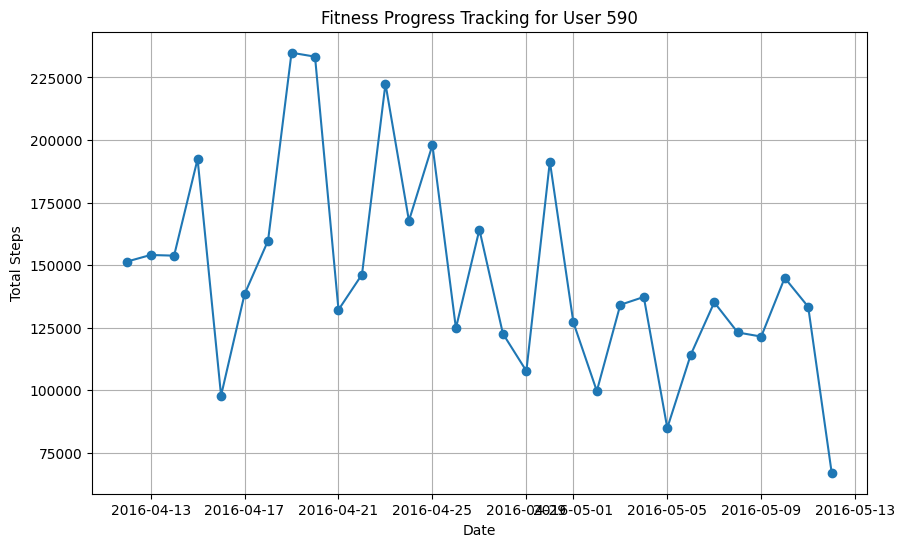

Fitness Progress Tracking Insights for User 590:
Average Daily Steps: 5615.72
Total Steps Increase: -84417 steps



In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def fitness_progress_tracking(user_id):
    """
    Track fitness progress over time using TotalSteps.

    Parameters:
    - user_id: ID of the user for whom progress is being tracked.

    Returns:
    - Progress visualization and insights.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Convert 'ActivityDate' to datetime for proper plotting
    user_data['ActivityDate'] = pd.to_datetime(user_data['ActivityDate'])

    # Group data by date and calculate the total steps for each day
    daily_steps = user_data.groupby('ActivityDate')['TotalSteps'].sum().reset_index()

    # Plot the fitness progress
    plt.figure(figsize=(10, 6))
    plt.plot(daily_steps['ActivityDate'], daily_steps['TotalSteps'], marker='o', linestyle='-')
    plt.title(f'Fitness Progress Tracking for User {user_id}')
    plt.xlabel('Date')
    plt.ylabel('Total Steps')
    plt.grid(True)
    plt.show()

    # Calculate insights
    average_daily_steps = user_data['TotalSteps'].mean()
    total_steps_increase = daily_steps['TotalSteps'].iloc[-1] - daily_steps['TotalSteps'].iloc[0]
    progress_insights = (
        f"Average Daily Steps: {average_daily_steps:.2f}\n"
        f"Total Steps Increase: {total_steps_increase} steps\n"
    )

    return progress_insights

# Example: Track fitness progress for user with ID 590
user_id = 590
progress_insights = fitness_progress_tracking(user_id)

print(f"Fitness Progress Tracking Insights for User {user_id}:\n{progress_insights}")


C:\Users\intag\AppData\Local\Temp\ipykernel_10000\2835882359.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_data['ActivityDate'] = pd.to_datetime(user_data['ActivityDate'])
C:\Users\intag\AppData\Local\Temp\ipykernel_10000\2835882359.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['ActivityDate'] = pd.to_datetime(user_data['ActivityDate'])


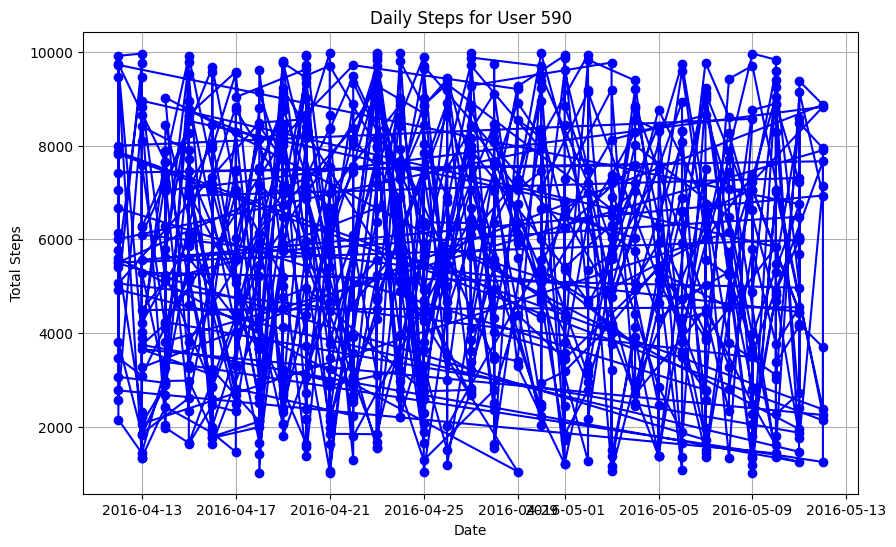

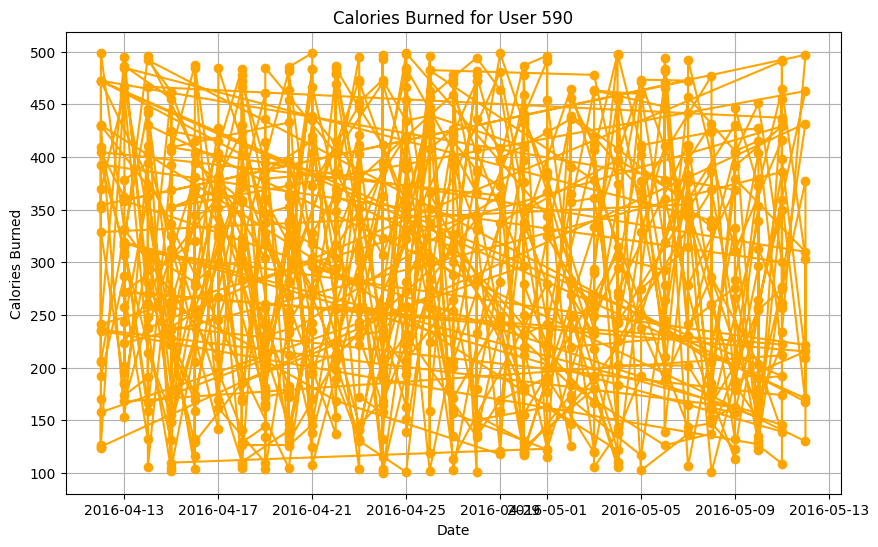

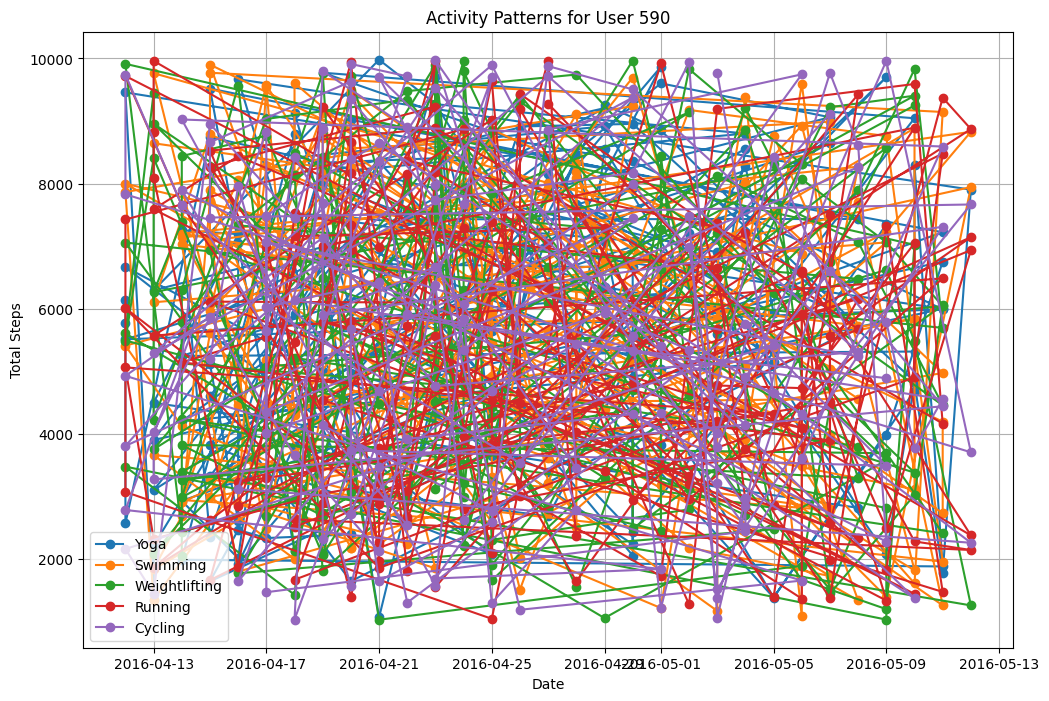

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def daily_activity_visualization(user_id):
    """
    Visualize daily activities for better user understanding.

    Parameters:
    - user_id: ID of the user for whom daily activities are being visualized.

    Returns:
    - Daily activity visualizations.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Convert 'ActivityDate' to datetime for proper plotting
    user_data['ActivityDate'] = pd.to_datetime(user_data['ActivityDate'])

    # Plot daily steps
    plt.figure(figsize=(10, 6))
    plt.plot(user_data['ActivityDate'], user_data['TotalSteps'], marker='o', linestyle='-', color='blue')
    plt.title(f'Daily Steps for User {user_id}')
    plt.xlabel('Date')
    plt.ylabel('Total Steps')
    plt.grid(True)
    plt.show()

    # Plot calories burned
    plt.figure(figsize=(10, 6))
    plt.plot(user_data['ActivityDate'], user_data['Calories_y'], marker='o', linestyle='-', color='orange')
    plt.title(f'Calories Burned for User {user_id}')
    plt.xlabel('Date')
    plt.ylabel('Calories Burned')
    plt.grid(True)
    plt.show()

    # Plot activity patterns
    activity_types = user_data['ActivityType'].unique()
    plt.figure(figsize=(12, 8))

    for activity_type in activity_types:
        activity_data = user_data[user_data['ActivityType'] == activity_type]
        plt.plot(activity_data['ActivityDate'], activity_data['TotalSteps'], label=activity_type, marker='o', linestyle='-')

    plt.title(f'Activity Patterns for User {user_id}')
    plt.xlabel('Date')
    plt.ylabel('Total Steps')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Visualize daily activities for user with ID 590
user_id = 590
daily_activity_visualization(user_id)


In [51]:
import pandas as pd

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def personalized_workout_plan(user_id, workout_duration=30, workout_intensity='moderate'):
    """
    Offer personalized workout plans based on historical data.

    Parameters:
    - user_id: ID of the user for whom the workout plan is being suggested.
    - workout_duration: Desired duration for each workout session (in minutes).
    - workout_intensity: Desired workout intensity ('light', 'moderate', 'intense').

    Returns:
    - Personalized workout plan.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Calculate average daily steps and intensity
    avg_daily_steps = user_data['TotalSteps'].mean()
    avg_intensity = user_data['Similarity'].mean()

    # Adjust workout intensity based on user's historical data
    if avg_intensity < 0.3:
        workout_intensity = 'light'
    elif avg_intensity > 0.7:
        workout_intensity = 'intense'

    # Create personalized workout plan
    workout_plan = (
        f"Personalized Workout Plan for User {user_id}:\n"
        f"-------------------------------------------------\n"
        f"- Workout Duration: {workout_duration} minutes\n"
        f"- Workout Intensity: {workout_intensity}\n"
        f"- Recommended Activities: "
    )

    # Recommend activities based on workout intensity
    if workout_intensity == 'light':
        recommended_activities = user_data[user_data['Similarity'] < 0.3]['ActivityType'].unique()[:3]
    elif workout_intensity == 'moderate':
        recommended_activities = user_data[user_data['Similarity'].between(0.3, 0.7)]['ActivityType'].unique()[:3]
    else:
        recommended_activities = user_data[user_data['Similarity'] > 0.7]['ActivityType'].unique()[:3]

    workout_plan += ', '.join(recommended_activities)

    return workout_plan

# Example: Offer personalized workout plan for user with ID 590
user_id = 590
personalized_plan = personalized_workout_plan(user_id, workout_duration=45, workout_intensity='moderate')

print(personalized_plan)


Personalized Workout Plan for User 590:
-------------------------------------------------
- Workout Duration: 45 minutes
- Workout Intensity: intense
- Recommended Activities: Yoga, Swimming, Weightlifting


In [52]:
import pandas as pd

# Assuming 'preprocessed_data' is your DataFrame containing the user data

def health_and_fitness_insights(user_id):
    """
    Provide overall insights into health and fitness based on historical data.

    Parameters:
    - user_id: ID of the user for whom insights are being provided.

    Returns:
    - Overall health and fitness insights.
    """
    # Filter data for the specific user
    user_data = preprocessed_data[preprocessed_data['Id'] == user_id]

    # Check if the user exists in the dataset
    if user_data.empty:
        raise ValueError(f"User with ID {user_id} not found in the dataset.")

    # Calculate aggregate metrics
    total_steps = user_data['TotalSteps'].sum()
    total_calories_burned = user_data['Calories_y'].sum()
    average_rating = user_data['Rating'].mean()

    # Identify achievements and areas for improvement
    achievements = []
    improvements = []

    if total_steps > 10000:
        achievements.append("Consistently achieving over 10,000 steps daily.")

    if total_calories_burned > 3000:
        achievements.append("Consistently burning over 3000 calories daily.")

    if average_rating > 7:
        achievements.append("Maintaining high average ratings for activities.")

    if total_steps < 5000:
        improvements.append("Consider increasing daily step count for better health.")

    if total_calories_burned < 2000:
        improvements.append("Consider incorporating more intense activities for better calorie burn.")

    # Create overall insights summary
    insights_summary = (
        f"Health and Fitness Insights for User {user_id}:\n"
        f"-------------------------------------------\n"
        f"Total Steps: {total_steps}\n"
        f"Total Calories Burned: {total_calories_burned}\n"
        f"Average Rating: {average_rating:.2f}\n\n"
        f"Achievements:\n"
        f"- {', '.join(achievements) if achievements else 'No achievements.'}\n\n"
        f"Areas for Improvement:\n"
        f"- {', '.join(improvements) if improvements else 'No areas for improvement.'}\n"
    )

    return insights_summary

# Example: Provide health and fitness insights for user with ID 590
user_id = 590
fitness_insights = health_and_fitness_insights(user_id)

print(fitness_insights)


Health and Fitness Insights for User 590:
-------------------------------------------
Total Steps: 4515041
Total Calories Burned: 238076.511628468
Average Rating: 5.46

Achievements:
- Consistently achieving over 10,000 steps daily., Consistently burning over 3000 calories daily.

Areas for Improvement:
- No areas for improvement.

